<a href="https://colab.research.google.com/github/Rutuja-7575/myfirstdevproject/blob/main/Fake_News_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gradio


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import string
import re
import pickle
import gradio as gr

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MLPROJECT/large_news_dataset.csv")

In [ ]:
import pandas as pd

# Load your dataset (example, adjust based on your dataset)
data = pd.read_csv("/content/drive/MyDrive/MLPROJECT/large_news_dataset.csv")  # replace 'your_dataset.csv' with the actual path

# Assuming the text data is in a column called 'text' and the labels are in a column called 'label'
X = data['text']  # the text data
y = data['label']  # the target labels (e.g., 'real' or 'fake')


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')

# Transform the text data
X_train_vec = vectorizer.fit_transform(X_train)  # fit_transform on the training data
X_test_vec = vectorizer.transform(X_test)  # transform on the test data


In [ ]:
df['label'] = df['label'].map({'FAKE': 0, 'REAL': 1})
df.dropna(inplace=True)

In [ ]:
def preprocess(text):
 text = text.lower()
 text = re.sub(r'\d+', '', text)
 text = text.translate(str.maketrans('', '', string.punctuation))
 text = re.sub(r'\s+', ' ', text).strip()
 stop_words = set(stopwords.words('english'))
 lemmatizer = WordNetLemmatizer()
 words = [lemmatizer.lemmatize(word) for word in text.split() if word not in
stop_words]
 return " ".join(words)

In [ ]:
# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess)

# Remove empty texts (if any) caused by stopword removal or bad data
df = df[df['clean_text'].str.strip() != '']

# Check again how many samples we have
print(f"Number of rows after preprocessing: {len(df)}")


Number of rows after preprocessing: 0


In [ ]:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
model = RandomForestClassifier(n_estimators=300, max_depth=50, random_state=42)
model.fit(X_train_vec, y_train)


RandomForestClassifier(max_depth=50, n_estimators=300, random_state=42)

In [ ]:
y_probs = model.predict_proba(X_test_vec)[:, 1]
y_pred = (y_probs >= 0.4).astype(int)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
with open("fake_news_model.pkl", "wb") as f:
 pickle.dump(model, f)


In [ ]:
with open("df_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)




In [ ]:
print(" Model and vectorizer saved as 'fake_news_model.pkl' and 'tfidf_vectorizer.pkl'")

 Model and vectorizer saved as 'fake_news_model.pkl' and 'tfidf_vectorizer.pkl'


In [ ]:
# Step 10: Gradio App for Prediction
def predict_news(news_text):
 cleaned_news = preprocess(news_text)
 vectorized_input = vectorizer.transform([cleaned_news])
 prediction = model.predict(vectorized_input)[0]
 return "Real News" if prediction == 1 else "Fake News"


In [ ]:
# Gradio Interface
interface = gr.Interface(
 fn=predict_news,
 inputs=gr.Textbox(lines=5, placeholder="Enter news text here..."),
 outputs="text",
 title="Fake News Detection",
 description="Enter a news article and the model will predict if it's real or fake."
)

In [ ]:
interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b3a5eb5d04f85aae15.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


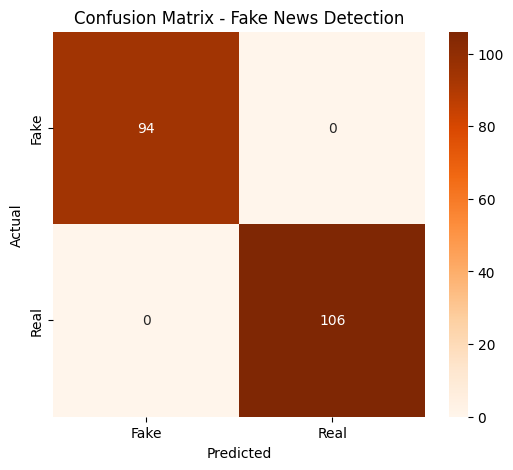

In [ ]:
# Import required libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Fake', 'Real']

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Fake News Detection')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


